In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [2]:
# Load the dataset
file_path = "/content/completeCleanedLabeled.csv"
data = pd.read_csv(file_path)

In [5]:
data.columns

Index(['Top100Year', 'SongTitle', 'Artist', 'LyricsStatus', 'ReleaseYear',
       'Genre', 'Lyrics', 'Label'],
      dtype='object')

In [6]:
# Keep only the necessary columns
data = data[['Genre', 'Lyrics', 'Label']]

In [7]:
# Display the first few rows to get an overview of the dataset
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,Genre,Lyrics,Label
0,"Contemporary R&B, R&B/Soul, Pop",Uh-huh! Iggy Iggs! got one problem girl hey He...,Negative
1,"Reggae fusion, Pop",Saturday morning jumped bed put best suit Got ...,Negative
2,"Reggae fusion, Pop",wrong thinking box stay wrong saying choose an...,Negative
3,"R&B/Soul, Pop",Ayo Jason (Oh yeah Say something Holla Haha go...,Positive
4,"R&B/Soul, Pop soul",would without smart mouth Drawing kicking got ...,Positive


In [8]:
# Check basic information about the data
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   843 non-null    object
 1   Lyrics  851 non-null    object
 2   Label   851 non-null    object
dtypes: object(3)
memory usage: 20.1+ KB


In [9]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
Genre     8
Lyrics    0
Label     0
dtype: int64


In [10]:
# Drop rows with missing values in the 'Genre' column
data = data.dropna(subset=['Genre'])

In [11]:
print(data.isnull().sum())

Genre     0
Lyrics    0
Label     0
dtype: int64


In [12]:
# Check basic statistics of the dataset
print("\nBasic Statistics:")
display(data.describe(include="all"))


Basic Statistics:


,Genre,Lyrics,Label
count,843,843,843
unique,233,836,3
top,"Alternative/Indie, Pop",swinging missing not broke yet damn needs fixi...,Positive
freq,41,2,535


In [13]:
# Show distinct values in the 'Label' column
distinct_labels = data['Label'].unique()
print("Distinct values in 'Label' column:", distinct_labels)


Distinct values in 'Label' column: ['Negative' 'Positive' 'Neutral']



Label Distribution:
Label
Positive    535
Negative    304
Neutral       4
Name: count, dtype: int64


<ipython-input-14-f31e25f8f8df>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data, palette='Set1')


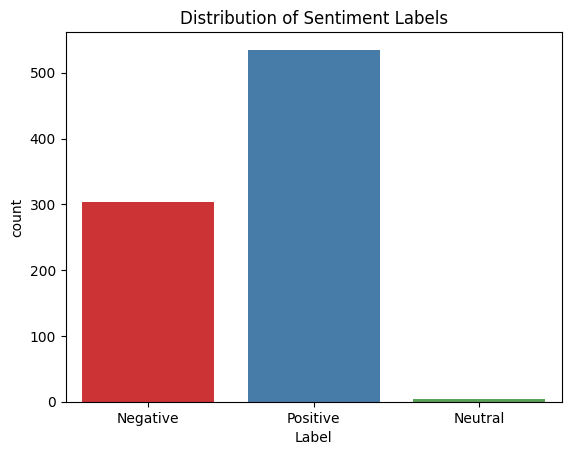

In [14]:
# Distribution of Labels
print("\nLabel Distribution:")
print(data['Label'].value_counts())
sns.countplot(x='Label', data=data, palette='Set1')
plt.title("Distribution of Sentiment Labels")
plt.show()


In [15]:
# Distinct Genre Analysis
# Split genres by comma and count unique occurrences
genres = data['Genre'].str.split(',').sum()  # Creates a list of all genres across rows
distinct_genres = set(genre.strip() for genre in genres)
print("\nTotal distinct genres:", len(distinct_genres))
print("List of distinct genres:", distinct_genres)


Total distinct genres: 156
List of distinct genres: {'Reggae', 'Art rock', 'New jack swing', 'Adult Contemporary', 'Nigerian Alté', 'Pop', 'Afroswing', 'R&B/Soul', 'House', 'Latin Urbano', 'Indie/Underground Hip-Hop', 'Emo rap', 'Cloud rap', 'Rap music', 'Post-disco', 'Dance-pop', 'Indie rock', 'Folk', 'New wave', 'Alternative rock', 'Vocal/Easy Listening', 'Neo-Soul', 'Alternative R&B', 'Classical', 'Dirty rap', 'Eurodance', 'Regional Mexican', 'House music', 'Latin trap', 'Christian', 'Dance music', 'Russian Indie', 'Regional Brazilian', 'Rap Québ', 'Electronic dance music', 'UK R&B', 'Comedy hip hop', 'Sandungueo', 'Disco', 'East Coast Hip-Hop', 'Folk-pop', 'Progressive house', 'Rock', 'Spoken Word', 'Electro', 'Space rock', 'Punk', 'Electro house', 'Moombahton', 'Afrobeat', 'Ballad', 'Folktronica', 'Country music', 'Groove metal', 'Arena rock', 'Corrido', 'Cumbia', 'Metal', 'Nigerian Hip Hop', 'Emo', 'Grunge', 'Alternative hip hop', 'Neo soul', 'Country rap', 'Pop rock', 'Alternat

In [27]:
# Function to generate word cloud for specific lyrics
def generate_wordcloud_for_lyrics(lyrics):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(lyrics)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud for Lyrics")
    plt.show()

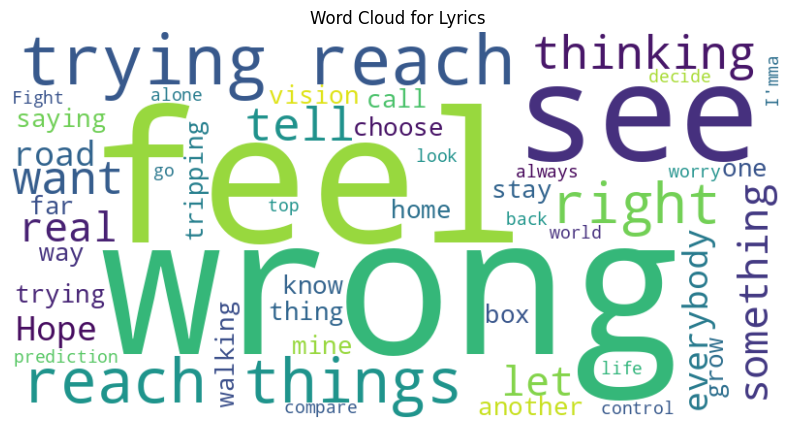

In [31]:

# Option to select a specific row (for example, select the first row, or any row based on your criteria)
specific_lyrics = data['Lyrics'].iloc[2]  # You can change the index or apply any filtering condition here

# Generate word cloud for the selected specific lyrics
generate_wordcloud_for_lyrics(specific_lyrics)

In [29]:
# Lyrics Length Analysis
data['Lyrics_Length'] = data['Lyrics'].apply(lambda x: len(str(x).split()))
print("\nAverage Lyrics Length (words):", data['Lyrics_Length'].mean())


Average Lyrics Length (words): 218.09489916963227


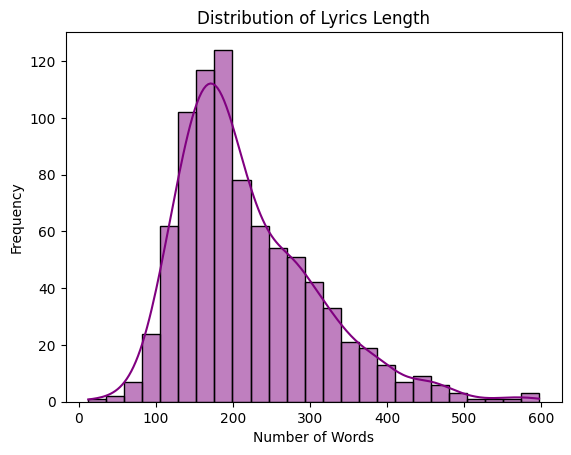

In [30]:
sns.histplot(data['Lyrics_Length'], kde=True, color="purple")
plt.title("Distribution of Lyrics Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()